## Lab 2
### Part 2: Dealing with overfitting

Today we work with [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist) (*hint: it is available in `torchvision`*).

Your goal for today:
1. Train a FC (fully-connected) network that achieves >= 0.885 test accuracy.
2. Cause considerable overfitting by modifying the network (e.g. increasing the number of network parameters and/or layers) and demonstrate in in the appropriate way (e.g. plot loss and accurasy on train and validation set w.r.t. network complexity).
3. Try to deal with overfitting (at least partially) by using regularization techniques (Dropout/Batchnorm/...) and demonstrate the results.

__Please, write a small report describing your ideas, tries and achieved results in the end of this file.__

*Note*: Tasks 2 and 3 are interrelated, in task 3 your goal is to make the network from task 2 less prone to overfitting. Task 1 is independent from 2 and 3.

*Note 2*: We recomment to use Google Colab or other machine with GPU acceleration.

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torchsummary
from IPython.display import clear_output
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import os


device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

ModuleNotFoundError: No module named 'torchsummary'

In [ ]:
# Technical function
def mkdir(path):
    if not os.path.exists(root_path):
        os.mkdir(root_path)
        print('Directory', path, 'is created!')
    else:
        print('Directory', path, 'already exists!')
        
root_path = 'fmnist'
mkdir(root_path)

Directory fmnist is created!


In [ ]:
download = True
train_transform = transforms.ToTensor()
test_transform = transforms.ToTensor()
transforms.Compose((transforms.ToTensor()))


fmnist_dataset_train = torchvision.datasets.FashionMNIST(root_path, 
                                                        train=True, 
                                                        transform=train_transform,
                                                        target_transform=None,
                                                        download=download)
fmnist_dataset_test = torchvision.datasets.FashionMNIST(root_path, 
                                                       train=False, 
                                                       transform=test_transform,
                                                       target_transform=None,
                                                       download=download)
X_train = fmnist_dataset_train.data
y_train = fmnist_dataset_train.targets
X_test = fmnist_dataset_test.data
y_test = fmnist_dataset_test.targets
X_train = X_train.float()
X_test = X_test.float()
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

Extracting fmnist/FashionMNIST/raw/train-images-idx3-ubyte.gz to fmnist/FashionMNIST/raw


Extracting fmnist/FashionMNIST/raw/train-labels-idx1-ubyte.gz to fmnist/FashionMNIST/raw


Extracting fmnist/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to fmnist/FashionMNIST/raw


Extracting fmnist/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to fmnist/FashionMNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
train_loader = torch.utils.data.DataLoader(fmnist_dataset_train, 
                                           batch_size=128,
                                           shuffle=True,
                                           num_workers=2)
test_loader = torch.utils.data.DataLoader(fmnist_dataset_test,
                                          batch_size=256,
                                          shuffle=False,
                                          num_workers=2)


### Task 1
Train a network that achieves $\geq 0.885$ test accuracy. It's fine to use only Linear (`nn.Linear`) layers and activations/dropout/batchnorm. Convolutional layers might be a great use, but we will meet them a bit later.

Создадим простую сеть, состоящую из двух линейных слоёв и содержащую около 80,000 обучаемых параметров. 

In [ ]:
class TinyNeuralNetwork(nn.Module):
    def __init__(self, input_shape=28*28, num_classes=10, input_channels=1):
        super(self.__class__, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(), # This layer converts image into a vector to use Linear layers afterwards
            # Your network structure comes here
            nn.Linear(input_shape, 100),
            nn.Sigmoid(),
            nn.Linear(100, num_classes)
        )
        
        
    def forward(self, inp):       
        out = self.model(inp)
        return out    

In [ ]:
torchsummary.summary(TinyNeuralNetwork().to(device), (28*28,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 100]          78,500
           Sigmoid-3                  [-1, 100]               0
            Linear-4                   [-1, 10]           1,010
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.30
Estimated Total Size (MB): 0.31
----------------------------------------------------------------


Your experiments come here:

Далее создадим две функции: одну для тренировки и обучения модели, вторую для построения графиков функции потерь и accuracy.

In [ ]:
def main_loop(n_epoch, test_accuracy, test_loss, train_accuracy, train_loss):

  # Your experiments, training and validation loops here
  for epoch in range(n_epoch):

      epoch_train_loss = []
      epoch_train_accuracy = []
      epoch_test_loss = []
      epoch_test_accuracy = []
      net.train()
      for img, label in train_loader:
          opt.zero_grad()
          img = img.float()
          img = img.to(device)
          label = label.to(device)

          preds = net.forward(img) 
          loss_value = loss(preds, label)
          loss_value.backward()
          
          opt.step()

          epoch_train_loss.append(loss_value.item())
          preds_train = preds.max(dim=1)[1]
          epoch_train_accuracy.append(np.sum(label.cpu().numpy() == preds_train.cpu().numpy().astype(float))/ len(label.cpu()))
      net.eval()
      for X_test, y_test in test_loader:
          X_test = X_test.to(device)
          y_test = y_test.to(device)
          label_pred_test = net.forward(X_test)
          loss_value = loss(label_pred_test, y_test)
          
          epoch_test_loss.append(loss_value.item())
          label_pred_test = label_pred_test.max(dim=1)[1]
          epoch_test_accuracy.append(np.sum(y_test.cpu().numpy() == label_pred_test.cpu().numpy().astype(float))/ len(y_test.cpu()))

      train_loss.append(np.mean(epoch_train_loss))
      train_accuracy.append(np.mean(epoch_train_accuracy))

      test_loss.append(np.mean(epoch_test_loss))
      test_accuracy.append(np.mean(epoch_test_accuracy))
      print('epoch =', epoch, np.mean(epoch_test_accuracy))

def plot_loss_accuracy_history(test_accuracy, test_loss, train_accuracy, train_loss):
  plt.figure(figsize = (16, 12))
  plt.grid()
  plt.plot(test_accuracy, c ='r', label = 'test_accuracy')
  plt.plot(test_loss, c= 'orange', label = 'test_loss')
  plt.plot(train_accuracy, c = 'g', label = 'train_accuracy')
  plt.plot(train_loss, c = 'b', label = 'train_loss')
  plt.legend()

Обучим первую нейросеть и построим необходимые графики.

In [ ]:
test_accuracy = []
test_loss = []
train_accuracy = []
train_loss = []

net = TinyNeuralNetwork().to(device)
opt = torch.optim.Adam(net.parameters(), lr=3.0e-4) # YOUR CODE HERE
loss = torch.nn.CrossEntropyLoss() # YOUR CODE HERE

main_loop(100, test_accuracy, test_loss, train_accuracy, train_loss)

epoch = 0 0.74892578125
epoch = 1 0.79833984375
epoch = 2 0.81962890625
epoch = 3 0.82783203125
epoch = 4 0.83564453125
epoch = 5 0.83916015625
epoch = 6 0.8419921875
epoch = 7 0.8494140625
epoch = 8 0.85029296875
epoch = 9 0.8529296875
epoch = 10 0.8568359375
epoch = 11 0.85830078125
epoch = 12 0.858984375
epoch = 13 0.861328125
epoch = 14 0.8611328125
epoch = 15 0.86591796875
epoch = 16 0.86650390625
epoch = 17 0.8669921875
epoch = 18 0.86748046875
epoch = 19 0.86826171875
epoch = 20 0.8703125
epoch = 21 0.869921875
epoch = 22 0.87197265625
epoch = 23 0.8708984375
epoch = 24 0.86943359375
epoch = 25 0.87041015625
epoch = 26 0.8689453125
epoch = 27 0.87490234375
epoch = 28 0.8748046875
epoch = 29 0.87431640625
epoch = 30 0.875390625
epoch = 31 0.8740234375
epoch = 32 0.8744140625
epoch = 33 0.87373046875
epoch = 34 0.87412109375
epoch = 35 0.8763671875
epoch = 36 0.87646484375
epoch = 37 0.8787109375
epoch = 38 0.8796875
epoch = 39 0.88017578125
epoch = 40 0.879296875
epoch = 41 0.880

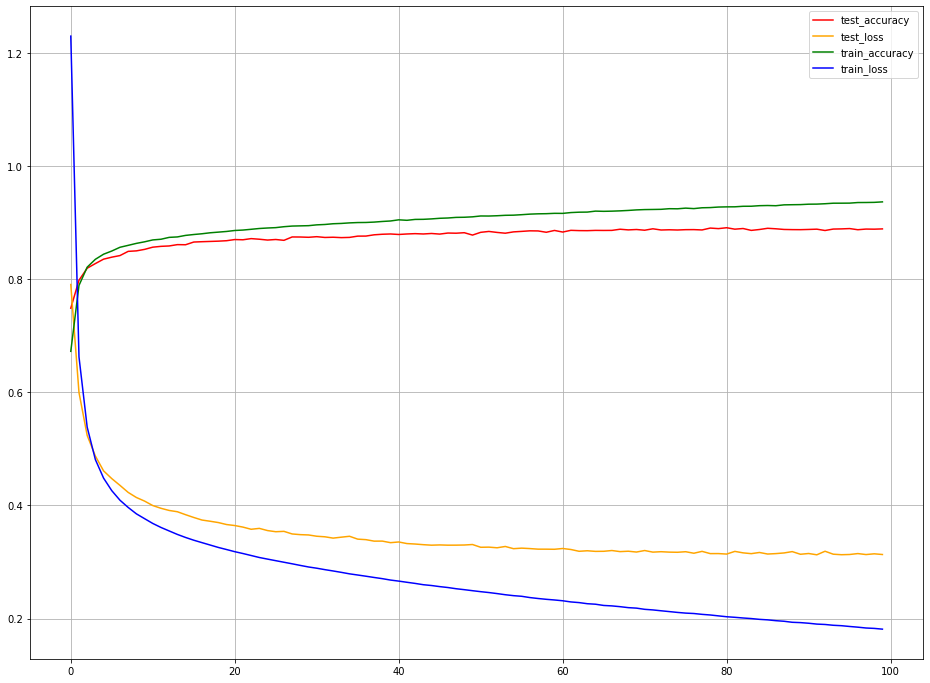

In [ ]:
plot_loss_accuracy_history(test_accuracy, test_loss, train_accuracy, train_loss)

За 100 эпох модель достигла точности 0.888. При этом момент переобучения не наступил, так как функция потерь падает как на тренировочной выборке, так и на тестовой. 

### Task 2: Overfit it.
Build a network that will overfit to this dataset. Demonstrate the overfitting in the appropriate way (e.g. plot loss and accurasy on train and test set w.r.t. network complexity).

*Note:* you also might decrease the size of `train` dataset to enforce the overfitting and speed up the computations.

Уменьшим размер тренировочного датасета до 20000 изображений (то есть в три раза) для того, чтобы ускорить процесс обучения и раньше добиться эффекта переобучения. Также понадобится новый DataLoader.  

In [ ]:
order = list(np.random.randint(0, len(fmnist_dataset_train), len(fmnist_dataset_train) // 3))
new_train_datadet = torch.utils.data.Subset(fmnist_dataset_train, order)

new_train_loader = torch.utils.data.DataLoader(new_train_datadet, 
                                           batch_size=128,
                                           shuffle=True,
                                           num_workers=2)

len(new_train_datadet)

20000

Постороим модель, состоящую из четырёх линейных слоёв и содержащую около 400,000 обучаемых параметров.

In [ ]:
class OverfittingNeuralNetwork(nn.Module):
    def __init__(self, input_shape=28*28, num_classes=10, input_channels=1):
        super(self.__class__, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(), # This layer converts image into a vector to use Linear layers afterwards
            # Your network structure comes here
            nn.Linear(input_shape, 400),
            nn.ReLU(),
            nn.Linear(400, 200),
            nn.ReLU(),
            nn.Linear(200, 50),
            nn.Sigmoid(),
            nn.Linear(50, num_classes)
        )
        
        
    def forward(self, inp):       
        out = self.model(inp)
        return out   

In [ ]:
torchsummary.summary(OverfittingNeuralNetwork().to(device), (28*28,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 400]         314,000
              ReLU-3                  [-1, 400]               0
            Linear-4                  [-1, 200]          80,200
              ReLU-5                  [-1, 200]               0
            Linear-6                   [-1, 50]          10,050
           Sigmoid-7                   [-1, 50]               0
            Linear-8                   [-1, 10]             510
Total params: 404,760
Trainable params: 404,760
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 1.54
Estimated Total Size (MB): 1.56
----------------------------------------------------------------


In [ ]:
test_accuracy = []
test_loss = []
train_accuracy = []
train_loss = []

net = OverfittingNeuralNetwork().to(device)
opt = torch.optim.Adam(net.parameters(), lr=3.0e-4) # YOUR CODE HERE
loss = torch.nn.CrossEntropyLoss() # YOUR CODE HERE

main_loop(120, test_accuracy, test_loss, train_accuracy, train_loss)

epoch = 0 0.77900390625
epoch = 1 0.83427734375
epoch = 2 0.84833984375
epoch = 3 0.8556640625
epoch = 4 0.86083984375
epoch = 5 0.86318359375
epoch = 6 0.8703125
epoch = 7 0.875390625
epoch = 8 0.876953125
epoch = 9 0.88173828125
epoch = 10 0.88173828125
epoch = 11 0.8712890625
epoch = 12 0.87548828125
epoch = 13 0.8837890625
epoch = 14 0.88798828125
epoch = 15 0.88720703125
epoch = 16 0.88671875
epoch = 17 0.88994140625
epoch = 18 0.88623046875
epoch = 19 0.88828125
epoch = 20 0.8900390625
epoch = 21 0.88994140625
epoch = 22 0.8904296875
epoch = 23 0.89130859375
epoch = 24 0.89404296875
epoch = 25 0.89052734375
epoch = 26 0.8921875
epoch = 27 0.8876953125
epoch = 28 0.894921875
epoch = 29 0.88984375
epoch = 30 0.892578125
epoch = 31 0.8990234375
epoch = 32 0.8951171875
epoch = 33 0.89931640625
epoch = 34 0.896875
epoch = 35 0.8962890625
epoch = 36 0.895703125
epoch = 37 0.8970703125
epoch = 38 0.8990234375
epoch = 39 0.89873046875
epoch = 40 0.895703125
epoch = 41 0.89521484375
epoch

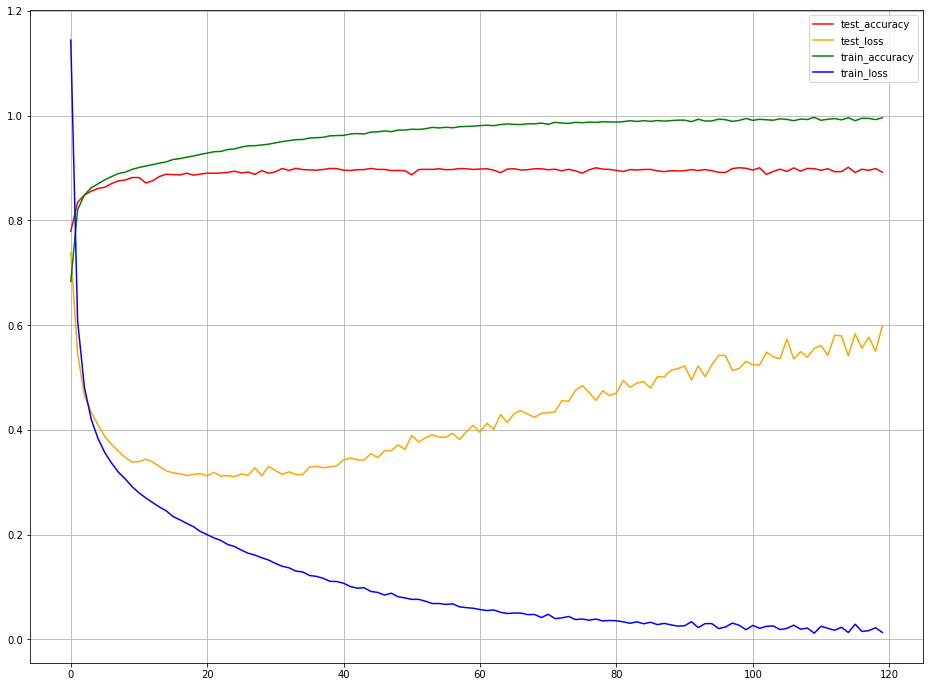

In [ ]:
plot_loss_accuracy_history(test_accuracy, test_loss, train_accuracy, train_loss)

Функция потерь падает на тренировочной части датасета, но начинает возрастать после 30 эпох на тестовой части датасета. Кроме того accuracy приближается к 1 на тренировочной части датасета. Следовательно, модель переобучилась.

### Task 3: Fix it.
Fix the overfitted network from the previous step (at least partially) by using regularization techniques (Dropout/Batchnorm/...) and demonstrate the results. 

Для устранения эффекта переобучения добавим слои DropOut и слои BatchNormalization. 

In [ ]:
class FixedNeuralNetwork(nn.Module):
    def __init__(self, input_shape=28*28, num_classes=10, input_channels=1):
        super(self.__class__, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(), # This layer converts image into a vector to use Linear layers afterwards
            # Your network structure comes here
            nn.Dropout(p=0.4),
            nn.Linear(input_shape, 400),
            nn.BatchNorm1d(400),
            nn.ReLU(),
            nn.Dropout(p=0.3),
            nn.Linear(400, 200),
            nn.BatchNorm1d(200),
            nn.ReLU(),
            nn.Dropout(p=0.3),
            nn.Linear(200, 50),
            nn.BatchNorm1d(50),
            nn.Sigmoid(),
            nn.Dropout(p=0.2),
            nn.Linear(50, num_classes)
        )
        
    def forward(self, inp):    
        out = self.model(inp)
        return out

In [ ]:
torchsummary.summary(FixedNeuralNetwork().to(device), (28*28,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
           Dropout-2                  [-1, 784]               0
            Linear-3                  [-1, 400]         314,000
       BatchNorm1d-4                  [-1, 400]             800
              ReLU-5                  [-1, 400]               0
           Dropout-6                  [-1, 400]               0
            Linear-7                  [-1, 200]          80,200
       BatchNorm1d-8                  [-1, 200]             400
              ReLU-9                  [-1, 200]               0
          Dropout-10                  [-1, 200]               0
           Linear-11                   [-1, 50]          10,050
      BatchNorm1d-12                   [-1, 50]             100
          Sigmoid-13                   [-1, 50]               0
          Dropout-14                   

In [ ]:
test_accuracy = []
test_loss = []
train_accuracy = []
train_loss = []

net = FixedNeuralNetwork().to(device)
opt = torch.optim.Adam(net.parameters(), lr=3.0e-4) # YOUR CODE HERE
loss = torch.nn.CrossEntropyLoss() # YOUR CODE HERE

main_loop(120, test_accuracy, test_loss, train_accuracy, train_loss)

epoch = 0 0.77275390625
epoch = 1 0.8
epoch = 2 0.80068359375
epoch = 3 0.81875
epoch = 4 0.8234375
epoch = 5 0.82373046875
epoch = 6 0.82900390625
epoch = 7 0.83447265625
epoch = 8 0.83603515625
epoch = 9 0.8337890625
epoch = 10 0.84013671875
epoch = 11 0.842578125
epoch = 12 0.8412109375
epoch = 13 0.84677734375
epoch = 14 0.8427734375
epoch = 15 0.84501953125
epoch = 16 0.84892578125
epoch = 17 0.8466796875
epoch = 18 0.8484375
epoch = 19 0.8427734375
epoch = 20 0.844921875
epoch = 21 0.84794921875
epoch = 22 0.85517578125
epoch = 23 0.84990234375
epoch = 24 0.85068359375
epoch = 25 0.8509765625
epoch = 26 0.854296875
epoch = 27 0.848828125
epoch = 28 0.85166015625
epoch = 29 0.8515625
epoch = 30 0.84931640625
epoch = 31 0.851953125
epoch = 32 0.8572265625
epoch = 33 0.85283203125
epoch = 34 0.84970703125
epoch = 35 0.8572265625
epoch = 36 0.85498046875
epoch = 37 0.8556640625
epoch = 38 0.85537109375
epoch = 39 0.855078125
epoch = 40 0.8572265625
epoch = 41 0.85400390625
epoch = 42

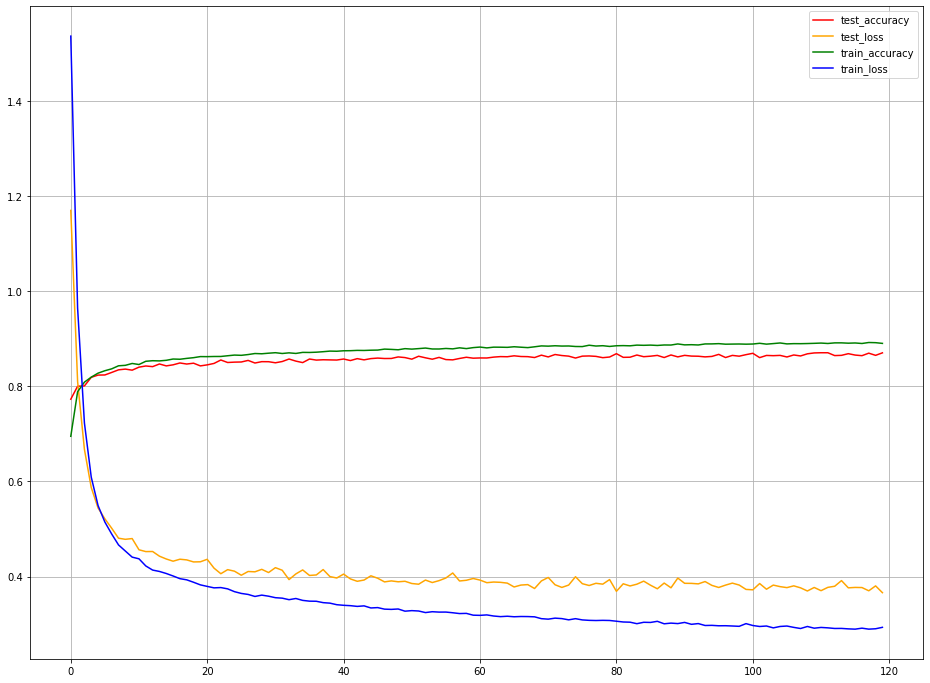

In [ ]:
plot_loss_accuracy_history(test_accuracy, test_loss, train_accuracy, train_loss)

### Conclusions:
_Write down small report with your conclusions and your ideas._

1) Нейронная сеть, состоящая из двух линейных слоёв и содержащая около 80,000 параметров, достатачно медленно обучается, но не достигает момента переобучения за 100 эпох обучения. (P.S для обучения использовался весь датасет train)

2) Нейронная сеть, состоящая из четырёх линейных слоёв и содержащая около 400,000 параметров, достатачно быстро обучается, но достигает момента переобучения уже на 30-ой эпохе. Это видного из того, что значение loss функции на тренировочной выборке падает, а на тестовой растёт - то есть модель просто запоминает датасет. (P.S для обучения использовалась треть датасета train)

3) Избежать переобучения помогает использование Dropout, который "выключает некоторые нейроны" с заданной вероятностью и слоёв нормализации BatchNorm, которые нормируют и центрируют данные. В итоге, сеть из предыдущего пункта не достигает момента переобучения даже после 120 эпох обучения (хотя раньше достигала уже на 30-ой). Это видно из того, что график loss функции убывает как на тренировочной части датасета так и на тестовой части датасета. 